### Interactive Workflow of Principal Component Analysis
    
#### The University of Texas at Austin, PGE 2020 SURI, Undergraduation Research Internship,
    
 #### Arham Junaid, Undergraduate Student, The University of Texas at Austin,
 
 #### [LinkedIn](https://www.linkedin.com/in/arhamjunaid)
   
 #### Supervised by,

 #### Michael Pyrcz, Associate Professor, University of Texas at Austin,
    
 ##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy),

#### Introduction

Hello and welcome to my workflow relating to Principal Component Analysis. Check out our [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) video walking you through this workflow. I am Arham Junaid, currently a student doing undergraduate in the Energy industry while exploring various Machine Learning methodologies. Principal Component Analysis is an example of inferential machine learning, essentially a method in which your data can be analyzed for dimensional reduction, relationships between variables and making predictions based on the relationships determined. 

#### Objective
In this workflow, we will explore 4 basic aspects of PCA. These include:

  - Orthogonal rotation and the incorporation of eigen math

  - Forward and backward transformations

  - Variance Explained

  - Dimensionality Reduction

PCA allows is to find good relationships within lower dimensions to allow for greater representation of a multivariate data set and has benefits including ease of visualization, multicollinearity and a reduction in data storage and computational analysis.

It is hoped that this interactive version of PCA will provide greater understanding with regards to the benefit of the method in general application.

#### Getting Started
Here are the steps to get setup in Python with the GeostatsPy package:
1.	Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2.	From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3.	In the terminal type: pip install geostatspy.
4.	Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.


You will need to copy the data file to your working directory. They are available here:
   - Tabular data - unconv_MV_v2.csv at https://git.io/fjmBH.


#### Install Packages
For this interactive workflow to work, we need to install several packages relating to display features and data analysis interpretation.

In [1]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns

#### The Data Set
Next, let’s go ahead and load the data set we are going to be working with. We’re able to view the variables relating to production.
This dataset has variables from 1,000 unconventional wells including:
 -	well average porosity
 - 	log transform of permeability (to linearize the relationships with other variables)
 -	accoustic impedance (kg/m^3 x m/s x 10^6)
 -	brittness ratio (%)
 -	total organic carbon (%)
 -	vitrinite reflectance (%)
 -	initial production 90 day average (MCFPD).
 -	scaled production

In [2]:
df=pd.read_csv("unconv_MV_v2.csv")
df

,Sample,Por,LogPerm,AI,Brittle,TOC,VR,Production,Prod2Scaled
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958,1897.657798
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778,2745.732996
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583,5835.130524
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629,2132.237219
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919,6282.254735
...,...,...,...,...,...,...,...,...,...
995,996,17.99,2.29,3.38,44.32,0.98,2.08,4211.527806,5230.433447
996,997,12.12,0.82,3.52,57.07,-0.04,1.73,1560.333735,2216.536779
997,998,15.55,1.50,2.48,58.25,1.89,2.35,2858.180459,3793.873108
998,999,20.89,2.02,3.23,46.17,1.71,2.27,6934.576348,7754.889551


We are also able to view some basic summary statistics relating to our variables and transpose the data set to make it easier for us to work with.

In [3]:
df = df.iloc[:,1:9]                                  # copy all rows and columns 1 through 9, note 0 column is removed
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


In order to go about dimensionality reduction, a useful first step is to develop a correlation matrix. The higher the correlation between your 2 variables, the more likely it is that your principal component scores will be able to account for a greater variance of your data.

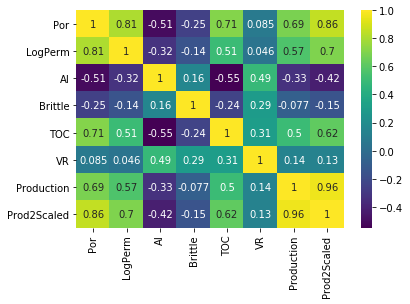

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

Next, we can go about ensuring the negative values are removed, namely for TOC and Brittleness, since those are not possible and we can set our data values into a single Data Frame.

In [5]:
num = df._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                     # truncate negative values to 0.0
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


From the correlation matrix above, can observe a mix of bivariate data, and linear correlation magnitudes and for additional visualization, we can take a look at the matrix scatter plot as we look to narrow down to 2 variables to allow for analysis of our data.

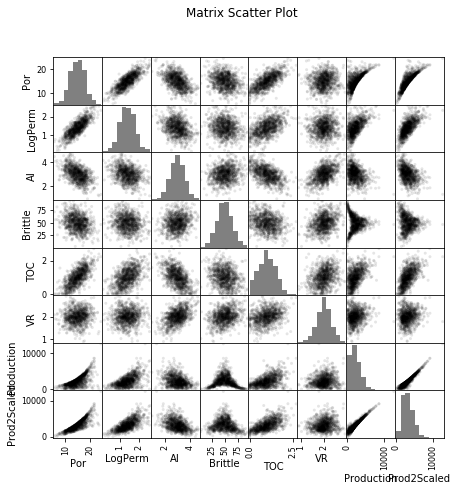

In [6]:
pd_plot.scatter_matrix(df, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(7, 7),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle("Matrix Scatter Plot")
plt.show()

As we work towards our first interactive example relating to a bivariate data set, let’s import a few widgets.

In [7]:
import ipywidgets as widgets
from ipywidgets import interactive, interact        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler



#### Orthogonal Rotation
For our first example, let’s explore the power of orthogonal rotation. As you may recall from any Differential Equations or Vector Calculus classes, eigen values and eigen vectors are based on the idea of the rotation of your axis. For our example, 2 variables, Por and TOC, with a relatively high correlation coefficient, were chosen to explore this idea further. For reduced computational load, only 100 values have been selected but you’re welcome to incorporate more of the data by copying and changing the code. For principle component scores to be calculated, the data first needs to be standardized. Then, we can have a go at visualizing how the data points alter as the angle of rotation varies.

In [8]:
my_data_por_perm = df[["Por","TOC"]]                # extract just por and TOC, 100 samples
my_data_por_perm =my_data_por_perm.iloc[0:100]
features = ['Por','TOC']
x = my_data_por_perm.loc[:,features].values
s = StandardScaler()
s.fit(x)
x = s.transform(x)                                  # standardize the data features to mean = 0, var = 1.0



In [9]:
global xdata                                        #create global values to allow for orthoganal rotation and visualization
global ydata
def pc_slider(Angle):
    global xdata
    global ydata
    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    line=plt.plot(x[:,0],x[:,1], 'o', transform= rot + base)
    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))
    
    plt.title("Chosen Angle for Data Set");plt.xlabel('Standardized Por'); plt.ylabel('Standardized TOC')

x1 = widgets.IntSlider(min=0, max = 180, value = 0, description = 'Angle',orientation='horizontal')
uik2 = widgets.VBox([x1],)
interactive_plot = widgets.interactive_output(pc_slider, {'Angle': x1})


In [10]:
display(uik2,interactive_plot)

Output()

Apart from a seemingly cool interaction, the visualization of this transformation of the data allows us to understand what PCA does, it finds a new axis which allows for the greatest capture of the variance. Below, we can see the calculation of the covariance matrix, which at angle 0, tells us that both variables have the same amount of influence on the variance. This changes with the angle of rotation. Moreover, we can see what proportion of the data is captured by each of the 2 Principal Components captures as the optimal rotation is determined based on eigen-math.

In [20]:
df2 = pd.DataFrame({'x':xdata, 'y':ydata})
data = df2.values


In [21]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data)
print(np.round(pca.components_,3))
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))

[[-0.105  0.995]
 [-0.995 -0.105]]
Variance explained by PC1 and PC2 = [0.86 0.14]


From here, we can go ahead and display the additional graphs relating to the PCA methodology as the dimensions are reduced, principal component scores are calculated and then the data is then transformed back into its original variables. Of course, as you change the angle of rotation of the original data, you can observe how the spread of the data changes along the calculated principal component scores. More on these graphs and dimensionality reduction below.

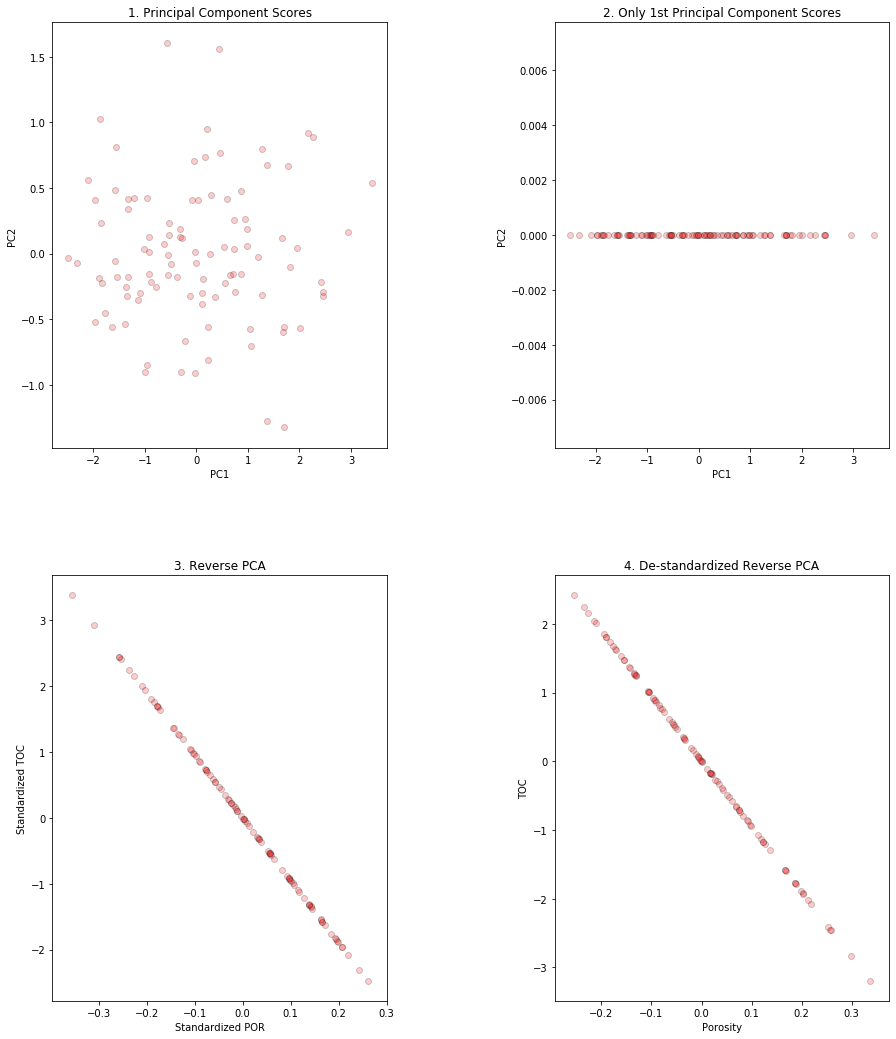

In [22]:
f, ( (ax203, ax204), (ax205, ax206)) = plt.subplots(2, 2,figsize=(15,18))
f.subplots_adjust(wspace=0.5,hspace = 0.3)
        
# ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")    
# ax201.set_title('1. '+column2+' vs. '+column1); 
# ax201.set_xlabel(column1); ax201.set_ylabel(column2)
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x_stand = StandardScaler().fit_transform(data)                     # standardize the data features to mean = 0, var = 1.0

# ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
# ax202.set_title('2. Standardized '+column2+' vs. '+column1); ax202.set_xlabel('Standardized '+column1); ax202.set_ylabel('Standardized '+column2)
nComp = 1

n_components = 2                                                   # build principal component model with 2 components
pca = PCA(n_components=n_components)
pca.fit(data)

x_trans = pca.transform(data)                                      # calculate principal component scores
ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax203.set_title('1. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
xtrans2 = x_trans.copy()
x_trans[:,1] = 0.0                                                 # zero / remove the 2nd principal component 

ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax204.set_title('2. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')
xtrans2[:,0] = 0

xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax205.set_title('3. Reverse PCA'); 
ax205.set_xlabel('Standardized POR'); ax205.set_ylabel('Standardized TOC')

xhat = np.dot(pca.inverse_transform(data)[:,:nComp], pca.components_[:nComp,:])
xhat = sd*xhat + mu                                                # remove the standardization
    
    
ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax206.set_title('4. De-standardized Reverse PCA'); 
ax206.set_xlabel('Porosity'); ax206.set_ylabel('TOC')


plt.show()

#### Forward and Backward Transformations
As you looked through the graphs above, you may have noticed the interesting transformations that took place, especially between graph 1 and 4 as the data was linearized based on the calculated Principal Component scores. The following interactive exercise reinforces this. Below you can choose an arbitrary value for a new data point, in blue. As you play around with where the new data point is placed, you notice that the data point can only go along the de-standardized line in graph 6. This is a key aspect of PCA relating to how the data is transformed based on the Principal Component scores calculated.



In [14]:
 def pc_slider(X, Y):
    nComp = 1
    f, ((ax201,ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(10,13))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)

    ax201.scatter(my_data_por_perm['Por'],my_data_por_perm['TOC'],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")    
    ax201.set_title('1. Porosity vs. TOC'); 
    ax201.set_xlabel("Porosity"); ax201.set_ylabel("TOC")
    features = ['Por','TOC']
    
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0
    temp = np.array([float(X), float(Y)])
    temp=temp.reshape(-1, 2)
    temp=s.transform(temp)
    

    ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax202.set_title('2. Standardized Por vs TOC'); ax202.set_xlabel('Standardized Porosity'); ax202.set_ylabel('Standardized TOC')
    

    n_components = 2                                                # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(data)                                   # calculate principal component scores
    ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
    x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

    ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')

    xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
    ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax205.set_title('5. Reverse PCA'); 
    ax205.set_xlabel('Standardized POR'); ax205.set_ylabel('Standardized TOC')

                        
    xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
    xhat = sd*xhat + mu                                               # remove the standardization
    
    xhat2 = np.dot(pca.inverse_transform(temp)[:,:nComp], pca.components_[:nComp,:])
    xhat2 = sd*xhat2 + mu  
    

    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax206.set_title('6. De-standardized Reverse PCA');
    ax206.set_xlabel('Porosity'); ax206.set_ylabel('TOC')

    
    ax201.plot(float(X),float(Y), "ob")
    ax206.plot(xhat2[:,0],xhat2[:,1], "ob")
    
interactive_output=interactive(pc_slider,X=(5,25), Y=(0,3,.1), continuous_update=False)
output = interactive_output.children[-1]
output.layout.height = '800px'
plt.show()

It’s interesting to note that the variance of each variable has been reduced based on the transformation and 54% of the overall Porosity and TOC can be explained by this model alone. This number can be significantly higher for other variable combinations as we see later on. 


In [15]:
var_por = np.var(my_data_por_perm['Por'])
var_por_hat = np.var(xhat[:,0])
var_logperm = np.var(my_data_por_perm['TOC'])
var_logperm_hat = np.var(xhat[:,1])

print('Variance '+'Por'+' = ',np.round(var_por,3),', Variance Reduced Dimensional '+'Por'+' =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
print('Variance '+'TOC'+' =',np.round(var_por,3),', Variance Reduced Dimensional '+'TOC'+' =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))



Variance Por =  7.89 , Variance Reduced Dimensional Por = 0.14 Fraction =  0.018
Variance TOC = 7.89 , Variance Reduced Dimensional TOC = 0.14 Fraction =  0.527


In [16]:
interactive_output

interactive(children=(IntSlider(value=15, description='X', max=25, min=5), FloatSlider(value=1.0, description=…

#### Dimensionality Reduction
PCA is all about dimensionality reduction. We can see this from the graphs detailed below and how analysis in reduced dimensions allows for a more compact visualization based on the calculation of the Principal Component scores. This is done by converting our data set into Principal Component scores and retaining p Principal Component scores. Here, you may choose your 2 variables to calculate your 2 Principal Component scores. Here, you can see how the mean and variance are transformed.

Additionally, as 7 different scores are calculated, you can see from the bar graph the proportion of the variance of the data which each principal component explains. Moreover, you can see how the bivariate relationship of the 2 variables improves as more principal components are included in your analysis. It is interesting to note however that the first principal component alone is able to describe a large percentage of the variance of that variable. For example, the first principal component captures 88% of the Porosity variance and 68% of the Permeability variance of the data set.


In [17]:
def firstvariable(column1="Por",
                 column2="LogPerm"):
    my_data_por_perm = df[[column1,column2]]                
    my_data_por_perm =my_data_por_perm.iloc[0:100]
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(my_data_por_perm[column1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax1.set_title(column1)
    ax2.hist(my_data_por_perm[column2], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax2.set_title(column2)
    plt.show()
    
    #sns.scatterplot(x=my_data_por_perm[column1],y=my_data_por_perm[column2],data=my_data_por_perm)

    features = [column1,column2]
    x = my_data_por_perm.loc[:,features].values
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

    print("Original Mean "+column1+' = ', np.round(mu[0],2), ', Original Mean '+column2+' = ', np.round(mu[1],2)) 
    print("Original StDev "+column1+' = ', np.round(sd[0],2), ', Original StDev '+column2+' = ', np.round(sd[1],2)) 
    print('Mean Transformed '+column1+' = ',np.round(np.mean(x[:,0]),2),', Mean Transformed '+column2+' = ',np.round(np.mean(x[:,1]),2))
    print('Variance Transformed '+column1+' = ',np.round(np.var(x[:,0]),2),', Variance Transformed '+column2+' = ',np.var(x[:,1]))
    
#     f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#     ax1.hist(x[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
#     ax1.set_title('Standardized '+column1)
#     ax2.hist(x[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
#     ax2.set_title('Standardized '+column2)
#     plt.show()
    
#     plt.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     plt.title('Standardized '+column1+' vs '+column2); plt.xlabel('Standardized '+column1); plt.ylabel('Standardized '+column2)
#     plt.show()
    n_components = 2
    pca = PCA(n_components=n_components)
    pca.fit(x)
    print(np.round(pca.components_,3))
    print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))
    
    
    f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,3))
    f.subplots_adjust(wspace=0.7)

    ax101.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax101.set_title('Standardized '+column2+' vs. '+column1); ax101.set_xlabel('Standardized '+column1); ax101.set_ylabel('Standardized '+column2)

    x_trans = pca.transform(x)                                # calculate the principal component scores
    ax102.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')

    x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
    ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized '+column1); ax103.set_ylabel('Standardized '+column2)
    plt.show()
    
    nComp = 1

#     f, ((ax201, ax202), (ax203, ax204), (ax205, ax206)) = plt.subplots(3, 2,figsize=(15,18))
#     f.subplots_adjust(wspace=0.5,hspace = 0.3)
    

   
#     ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax201.set_title('1. '+column2+' vs. '+column1); ax201.set_xlabel(column1); ax201.set_ylabel(column2)


    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

#     ax202.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax202.set_title('2. Standardized '+column2+' vs. '+column1); ax202.set_xlabel('Standardized '+column1); ax202.set_ylabel('Standardized '+column2)

    n_components = 2                                          # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(x)                                # calculate principal component scores
#     ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')

    x_trans[:,1] = 0.0                                         # zero / remove the 2nd principal component 

#     ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')

    xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values
#     ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax205.set_title('5. Reverse PCA'); ax205.set_xlabel('Standardized '+column1); ax205.set_ylabel('Standardized '+column2)

    xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
    xhat = sd*xhat + mu                                       # remove the standardization
     
    
    
#     ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
#     ax206.set_title('6. De-standardized Reverse PCA'); ax206.set_xlabel(column1); ax206.set_ylabel(column2)

#     plt.show()
    f, (ax201, ax206) = plt.subplots(1, 2,figsize=(10,3))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)
    
    ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax201.set_title(column2+' vs. '+column1); ax201.set_xlabel(column1); ax201.set_ylabel(column2)

    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    ax206.set_title('De-standardized Reverse PCA'); ax206.set_xlabel(column1); ax206.set_ylabel(column2)
    
          
#         pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                # pandas matrix scatter plot
#         figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
#         plt.suptitle(str(PCs)+' Principle Components')
#         n_components = PCs
#         pca_f7 = PCA(n_components=n_components)
#         pca_f7.fit(x_f7)
#         labels = 'Variance Explained', 'Variance Missing'
#         sizes = []
#         sizes.append(sum(np.round(pca_f7.explained_variance_ratio_,3)))
#         sizes.append(1-sum(np.round(pca_f7.explained_variance_ratio_,3)))
#         fig1, ax1 = plt.subplots()
#         ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#                 shadow=True, startangle=90)
#         ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

    var_por = np.var(my_data_por_perm[column1]); var_por_hat = np.var(xhat[:,0]);
    var_logperm = np.var(my_data_por_perm[column2]); var_logperm_hat = np.var(xhat[:,1]);
    print('Variance '+column1+' = ',np.round(var_por,3),', Variance Reduced Dimensional '+column1+' =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
    print('Variance '+column2+' =',np.round(var_por,3),', Variance Reduced Dimensional '+column2+' =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))

    global my_data_f7
    my_data_f7=df.copy(deep=True)
    
    np.set_printoptions(suppress=True)
    features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
    x_f7 = my_data_f7.loc[:,features].values
    mu_f7 = np.mean(x_f7, axis=0)
    sd_f7 = np.std(x_f7, axis=0)
    x_f7 = StandardScaler().fit_transform(x_f7)

    print("Original Means = ", features[:], np.round(mu_f7[:],2)) 
    print("Original StDevs = ", features[:],np.round(sd_f7[:],2)) 
    print('Mean Transformed = ',features[:],np.round(x.mean(axis=0),2))
    print('Variance Transformed = ',features[:],np.round(x.var(axis=0),2))
    
    n_components = 7
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    print('\n\nVariance explained by PC1 thru PC7 =', np.round(pca_f7.explained_variance_ratio_,3))
    fig5 = plt.figure(figsize=(3,3))
    ax = fig5.add_axes([0,0,1,1])
    langs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
    ax.bar(langs,np.round(pca_f7.explained_variance_ratio_,3))
    ax.set_title('Variance Explained by Principal Component'); ax.set_xlabel("Principal Component"); ax.set_ylabel("Fraction of Variance")
    
    nComp=7
    x_hat_dim=[]
    while nComp >=1: 
        temp_xhat_dim = np.dot(pca_f7.transform(x_f7)[:,:nComp], pca_f7.components_[:nComp,:])
        temp_xhat_dim= sd_f7*temp_xhat_dim + mu_f7
        nComp-=1
        x_hat_dim.append(temp_xhat_dim)



    f, axes2 = plt.subplots(1, 8, figsize=(20,20))
    f.subplots_adjust(wspace=0.7)
    columns=['Std. Porosity','Std. Log[Perm.]','Std. Acoustic Imped.','Std. Brittleness','Std. Total Organic C', 'Std. Vit. Reflectance', 'Std. Production']
    axes2[0].scatter(my_data_f7[column1],my_data_f7[column2],s=None, c="red",marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
    axes2[0].set_title('Original Data'); axes2[0].set_xlabel(column1); axes2[0].set_ylabel(column2)
    axes2[0].set_ylim(0.0,3.0); axes2[0].set_xlim(8,22); axes2[0].set_aspect(4.0); 
    i=1
    title=['7 Principal Component','6 Principal Components', '5 Principal Components','4 Principal Components', '3 Principal Components', '2 Principal Components', '1 Principal Components' ]
    while i<len(axes2):
           axes2[i].scatter(x_hat_dim[i-1][:,0],x_hat_dim[i-1][:,4],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
           axes2[i].set_title(title[i-1]); axes2[i].set_xlabel(column1); axes2[i].set_ylabel(column2)
           axes2[i].set_ylim(0.0,3.0); axes2[i].set_xlim(8,22); axes2[i].set_aspect(4.0)
           i+=1
    plt.show()

    i=len(x_hat_dim)-1
    while i>=0:
        print(title[i]+': Variance '+column1+' = ',np.round(np.var(x_hat_dim[i][:,0])/(sd_f7[0]*sd_f7[0]),2),' Variance '+column2+' = ',np.round(np.var(x_hat_dim[i][:,4])/(sd_f7[4]*sd_f7[4]),2))
        i-=1

    global df_dim
    df_dim=[]
    i=len(x_hat_dim)-1
    while i>=0:
        df_1d = pd.DataFrame(data=x_hat_dim[i],columns=features)  
        i-=1
        df_dim.append(df_1d)


interact(firstvariable,column1=["Por", "LogPerm","AI", "Brittle","TOC","VR"],column2=["Por", "LogPerm","AI", "Brittle","TOC","VR"])

plt.show()

interactive(children=(Dropdown(description='column1', options=('Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR')…

#### Variance Explained
As can be seen from the data display above, the more principal components we include, the greater the resemblance of your original data. That being said, even the first 2 principle components can tell us a significant amount in relation to the 2 variables and their variance. As we see from the from interaction below, the number of principal components can be chosen, and the corresponding overall variance of the data set can be explained. What isn’t explained is the variance lost, a percentage that is in the minority after selecting a mere 2 principal components alone.


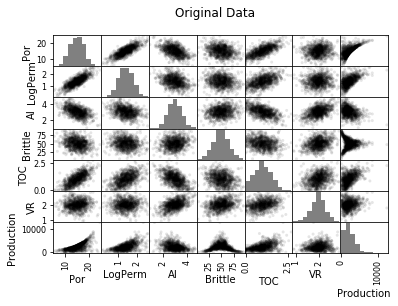

In [18]:
pd_plot.scatter_matrix(my_data_f7.drop('Prod2Scaled',axis=1), alpha = 0.1,           # pandas matrix scatter plot
figsize=(6, 4),color = 'black', hist_kwds={'color':['grey']})
features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
x_f7 = my_data_f7.loc[:,features].values
plt.suptitle('Original Data')
x_f7 = StandardScaler().fit_transform(x_f7)

In [19]:
def pc_slider(PCs):
    pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                # pandas matrix scatter plot
    figsize=(6, 6),color = 'black', hist_kwds={'color':['grey']})
    plt.suptitle(str(PCs)+' Principle Components')
    n_components = PCs
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    labels = 'Variance Explained', 'Variance Missing'
    sizes = []
    sizes.append(sum(np.round(pca_f7.explained_variance_ratio_,3)))
    sizes.append(1-sum(np.round(pca_f7.explained_variance_ratio_,3)))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')                                                # Equal aspect ratio ensures that pie is drawn as a circle.
_=interact(pc_slider,PCs=(1,7), continuous_update=False)

interactive(children=(IntSlider(value=4, description='PCs', max=7, min=1), Output()), _dom_classes=('widget-in…

#### Comments
This is an interactive workflow displaying the key aspects of Principal Components. Appreciation to **Arham Junaid** for writing this code and providing this documentation as part of the SURI program at The University of Texas at Austin.
For more about in-depth workflows on PCA, check out INSERT LINK HERE and the YouTube video associated with this interactive workflow.

If you want to learn more about data analytics and machine learning in Python, The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 

We hope this was helpful.

*Arham and Michael*

### More on Arham Junaid:
Arham is a world citizen who has resided in 5 countries and has spent time in various industries including Emergency Services, the Automotive industry and the Oil & Gas industry. He is currently pursuing a Mechanical Engineering degree and continues to seek experiences which combine his technical expertise with his leadership and business passion. 

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

 ### Michael Pyrcz, Associate Professor, University of Texas at Austin
 
   *Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*
    
   With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development.
    
   For more about Michael check out these links,
    
   #### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1),
    
   #### Want to Work Together?
   
   I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate,
    
   * Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you!
    
   * Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!
   
   * I can be reached at mpyrcz@austin.utexas.edu.
   
I'm always happy to discuss,
   
*Michael*
  
Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
    
#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
   